In [1]:
# make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Identification of Cointegrated Pairs of Stocks

In [2]:
# read back the pricing data
prices = pd.read_csv('consumer_durable.csv', index_col=['date'])
prices.head(10)

TITAN.NS  HAVELLS.NS   VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
date                                                                        
01-01-2018  852.450012  554.450012  648.950012   270.600006    755.299988   
02-01-2018  845.150024  549.250000  647.400024   277.799988    753.900024   
03-01-2018  856.299988  555.650024  643.599976   280.149994    772.400024   
04-01-2018  892.900024  562.849976  645.700012   282.950012    767.349976   
05-01-2018  909.700012  566.049988  646.349976   279.000000    764.799988   
08-01-2018  926.099976  563.099976  638.650024   273.950012    761.549988   
09-01-2018  932.950012  552.250000  648.599976   276.100006    746.900024   
10-01-2018  917.599976  549.700012  629.299988   270.500000    753.950012   
11-01-2018  906.900024  548.799988  625.849976   272.649994    749.700012   
12-01-2018  903.799988  549.099976  633.950012   272.250000    746.099976   

            KAJARIACER.NS  RAJESHEXPO.NS   RELAXO.NS  BLUESTARCO.NS  
date                                                                 
01-01-2018     725.099976     804.700012  343.424988     821.500000  
02-01-2018     712.950012     816.250000  335.450012     817.799988  
03-01-2018     736.950012     809.750000  343.000000     818.200012  
04-01-2018     743.700012     847.750000  340.200012     815.000000  
05-01-2018     750.849976     820.549988  339.774994     819.750000  
08-01-2018     748.150024     820.349976  336.875000     816.500000  
09-01-2018     753.000000     827.450012  337.274994     804.349976  
10-01-2018     747.599976     827.150024  339.950012     806.500000  
11-01-2018     742.000000     818.299988  337.600006     800.799988  
12-01-2018     739.549988     818.250000  339.024994     789.400024

In [3]:
# train test split 
train_close, test_close = train_test_split(prices, test_size=0.251012, shuffle=False)

In [4]:
# quick view of head and tail of train set
train_close.head(2).append(train_close.tail(2))

TITAN.NS  HAVELLS.NS   VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
date                                                                         
01-01-2018   852.450012  554.450012  648.950012   270.600006    755.299988   
02-01-2018   845.150024  549.250000  647.400024   277.799988    753.900024   
30-12-2020  1552.599976  904.650024  819.799988   368.350006   1581.099976   
31-12-2020  1567.150024  916.150024  825.650024   380.549988   1579.650024   

            KAJARIACER.NS  RAJESHEXPO.NS   RELAXO.NS  BLUESTARCO.NS  
date                                                                 
01-01-2018     725.099976     804.700012  343.424988     821.500000  
02-01-2018     712.950012     816.250000  335.450012     817.799988  
30-12-2020     689.650024     486.799988  801.299988     801.549988  
31-12-2020     703.599976     490.549988  809.700012     801.099976

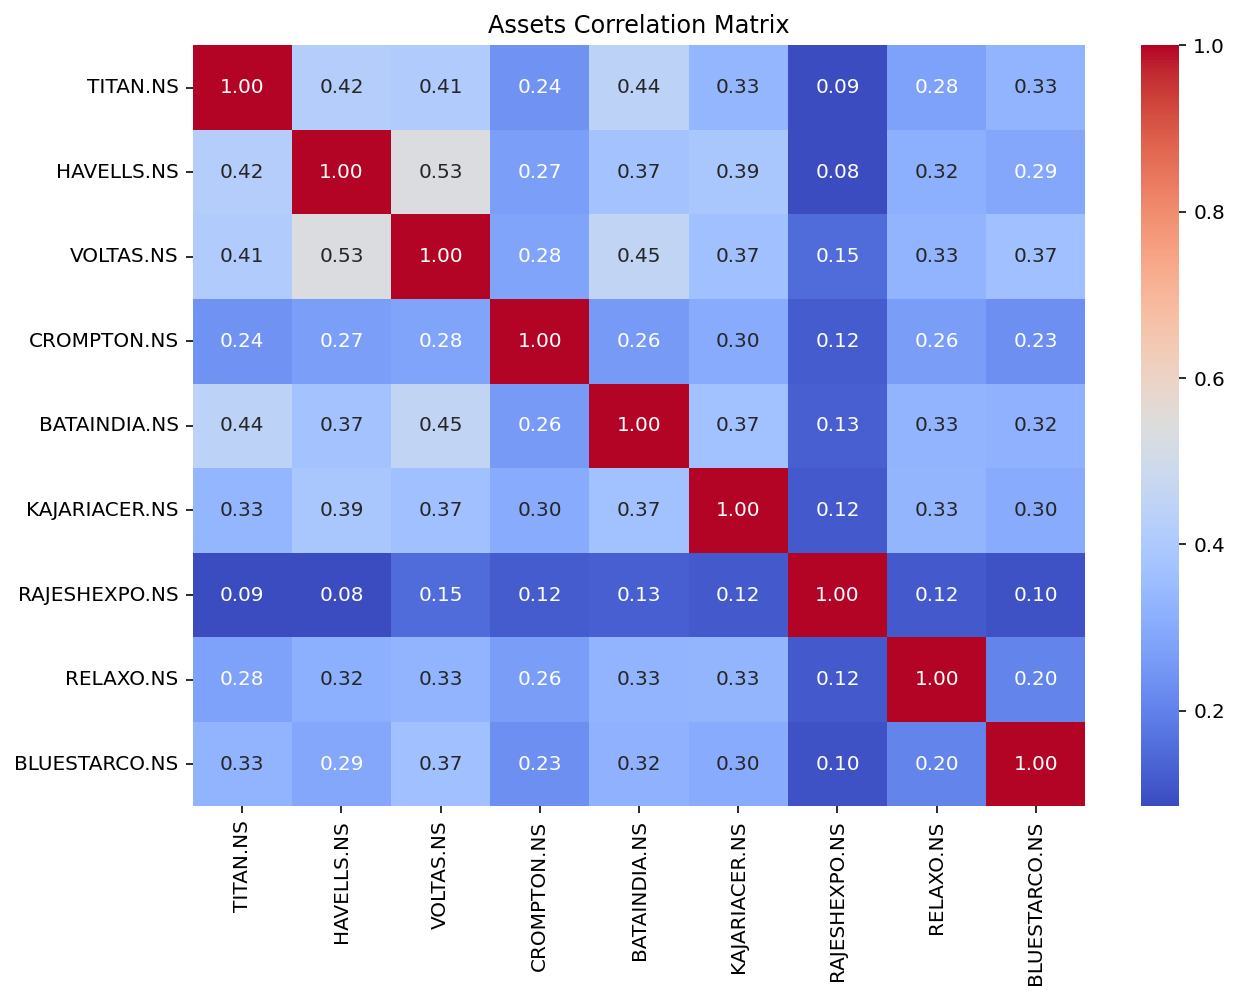

In [5]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.savefig('chart1', dpi=400)

In [6]:
# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('VOLTAS.NS', 'CROMPTON.NS')]


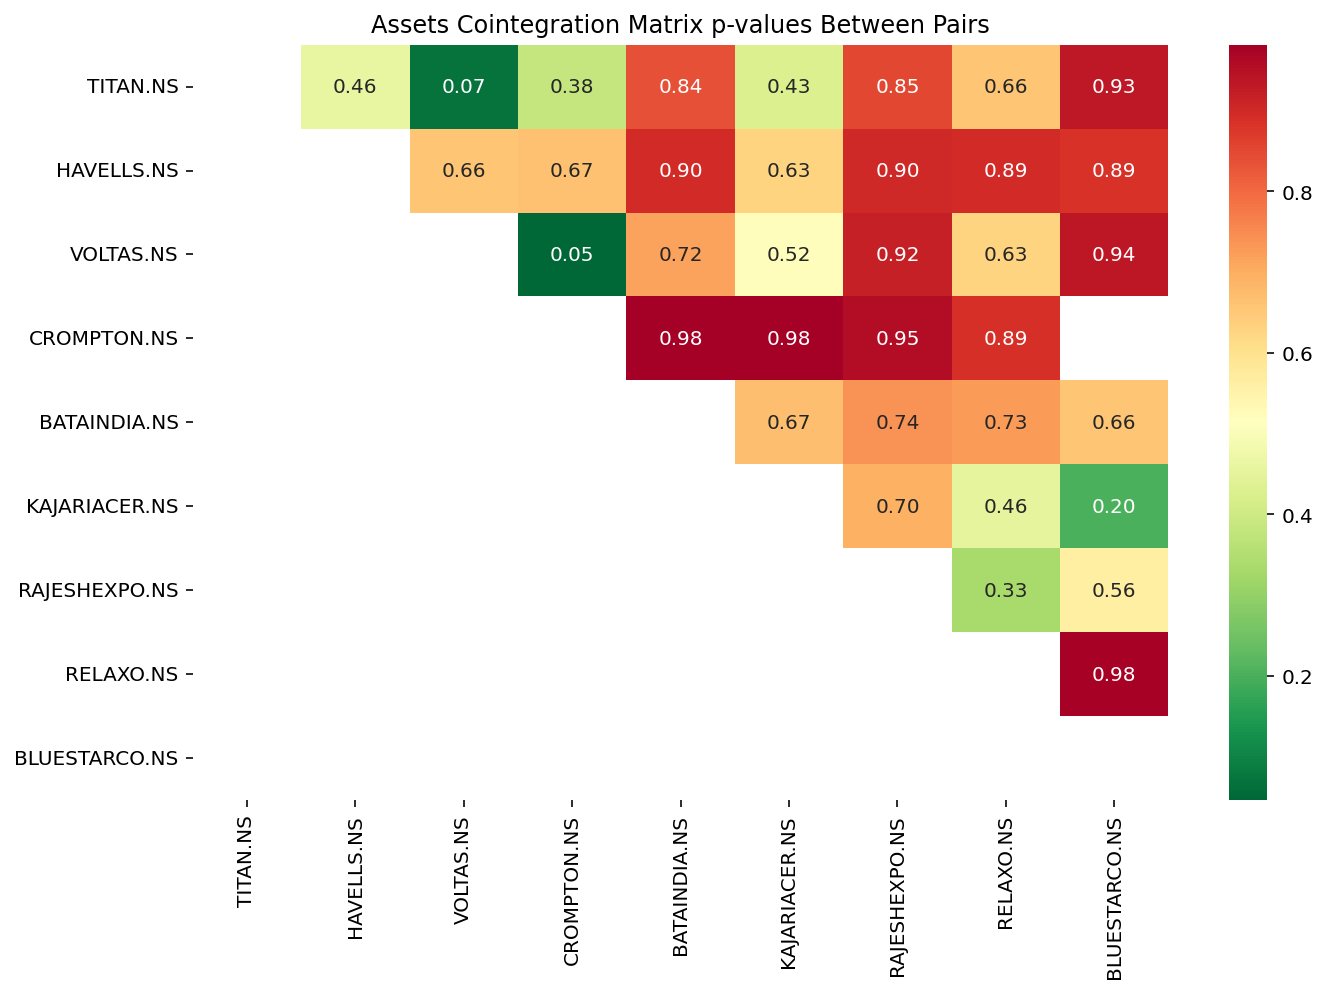

In [7]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.savefig('chart2', dpi=400) 

### Perform a Cointegration test for the Selected Pair

In [8]:
# final pair to test strategy
asset1 = 'RAJESHEXPO.NS'
asset2 = 'RELAXO.NS'

In [9]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

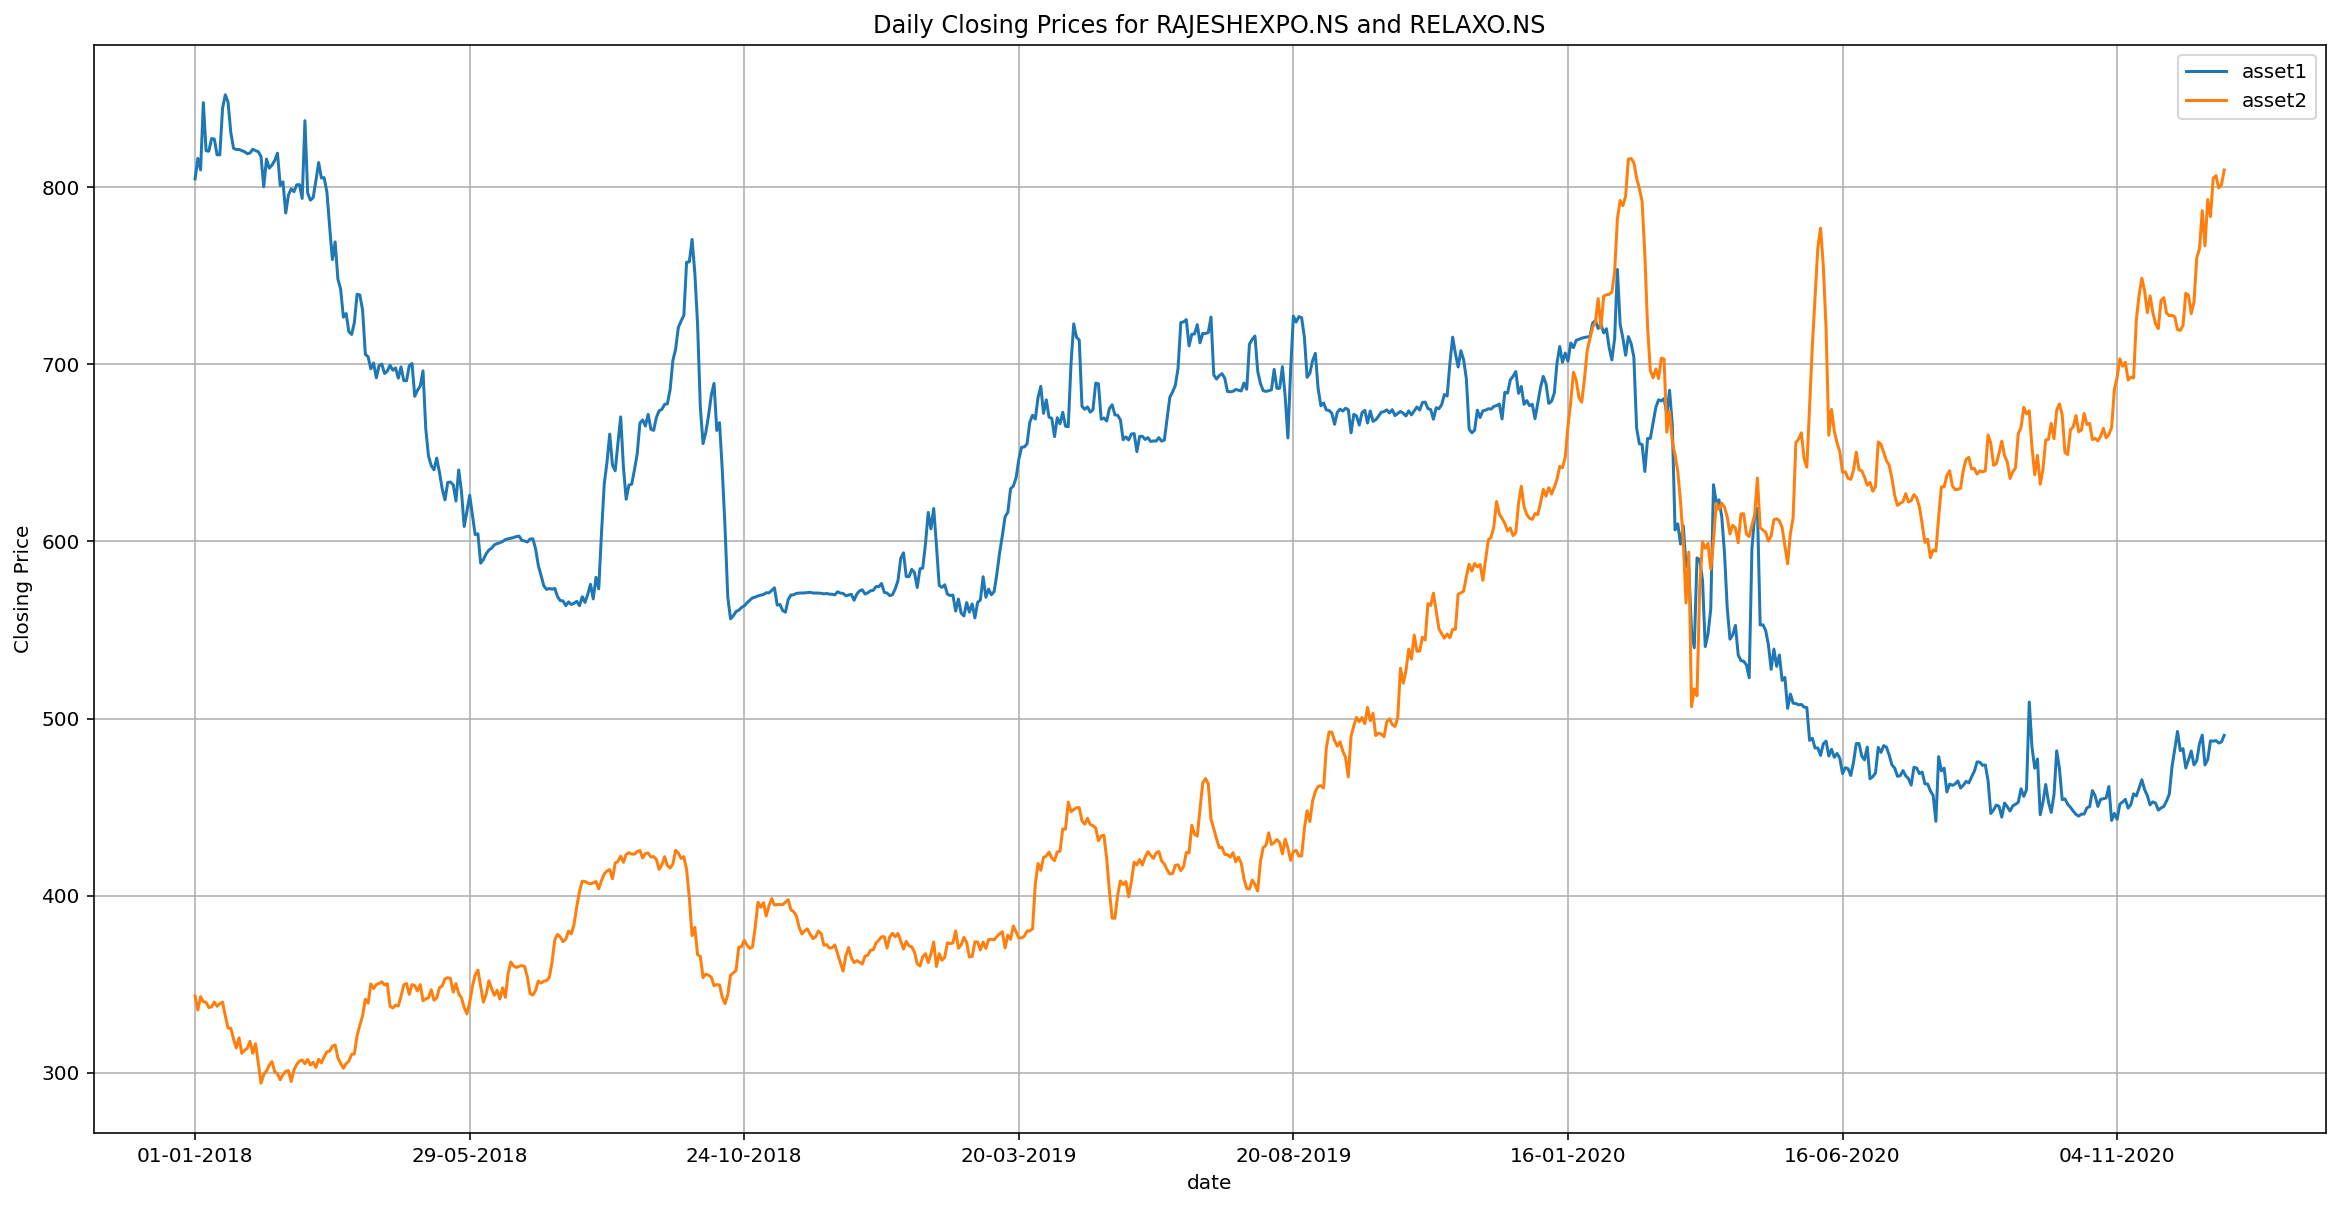

In [10]:
from matplotlib.dates import DateFormatter
# visualize closing prices
ax = train[['asset1','asset2']].plot(figsize=(20, 10), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
#date_form = DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_form)
ax.grid(True);
plt.savefig('chart3', dpi=400) 

In [11]:
# run OLS regression
model=sm.OLS(train.asset2, train.asset1).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 asset2   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                              4325.
Date:                Mon, 21 Mar 2022   Prob (F-statistic):                   4.37e-311
Time:                        08:17:31   Log-Likelihood:                         -4957.5
No. Observations:                 740   AIC:                                      9917.
Df Residuals:                     739   BIC:                                      9922.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
asset1         0.7594      0.012     65.768      0.000       0.737       0.782
==============================================================================
Omnibus:                      113.593   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.034
Skew:                           0.355   Prob(JB):                     1.23e-09
Kurtosis:                       2.091   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

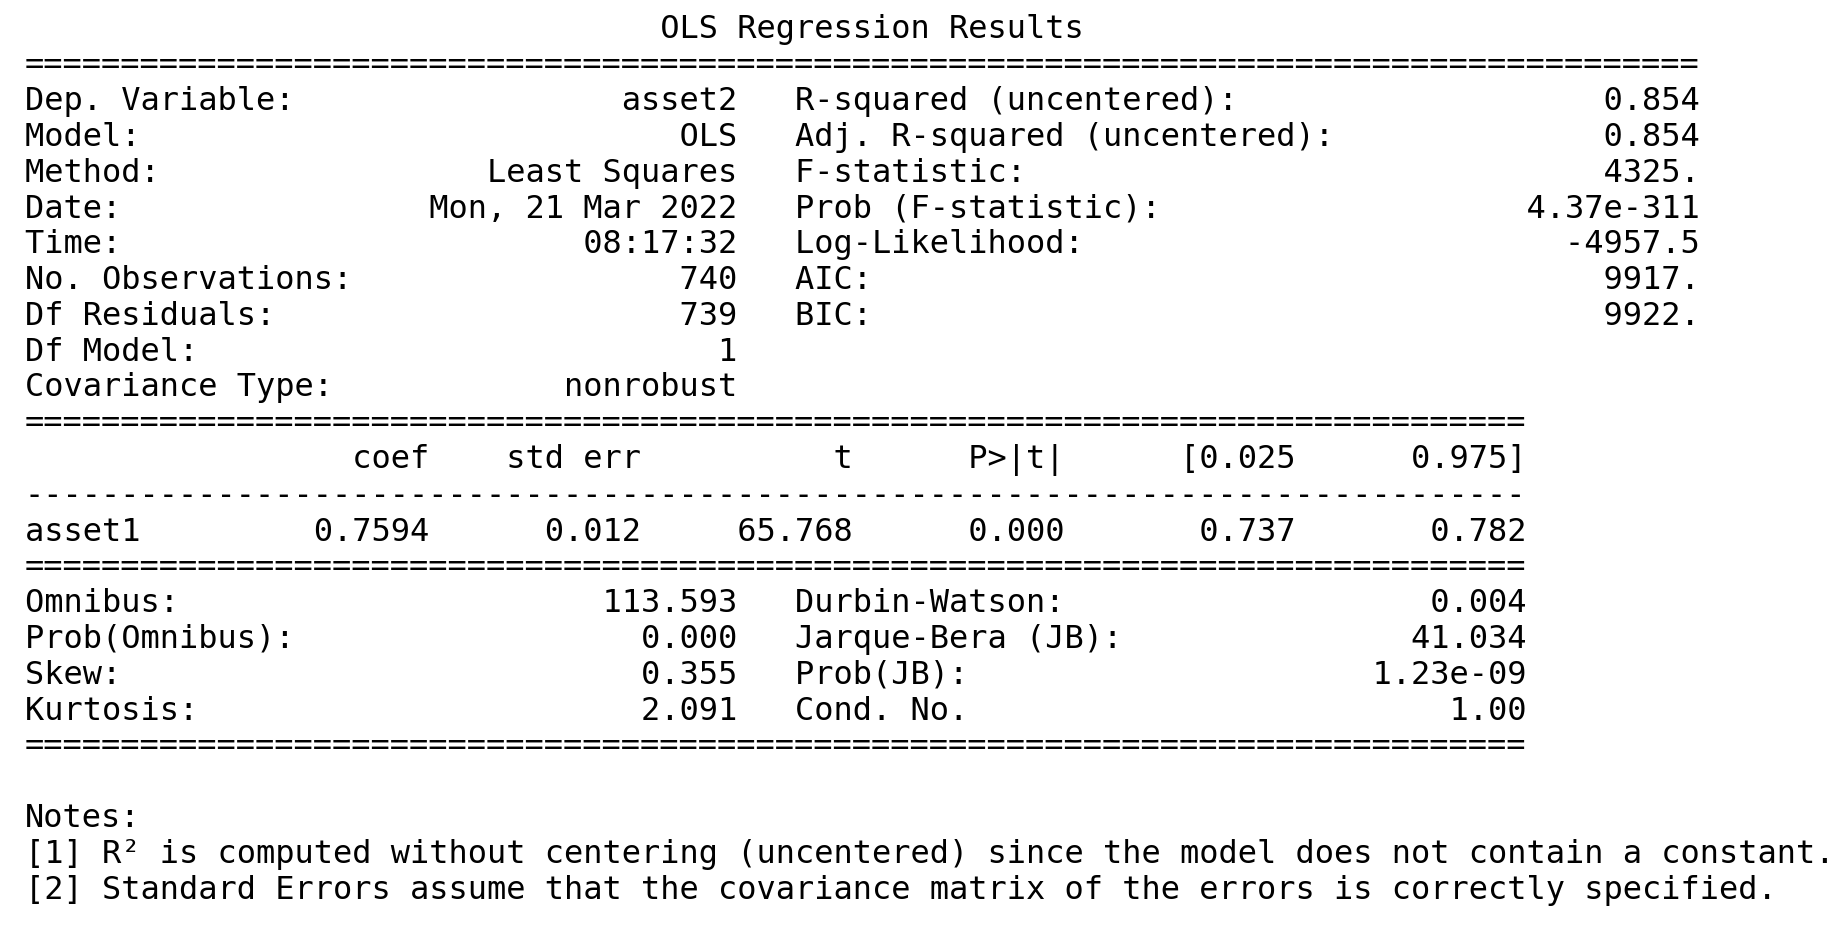

In [13]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.savefig('chart4', dpi=400);

In [14]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.7593844497656428


In [15]:
# calculate spread
spread = train.asset2 - model.params[0] * train.asset1

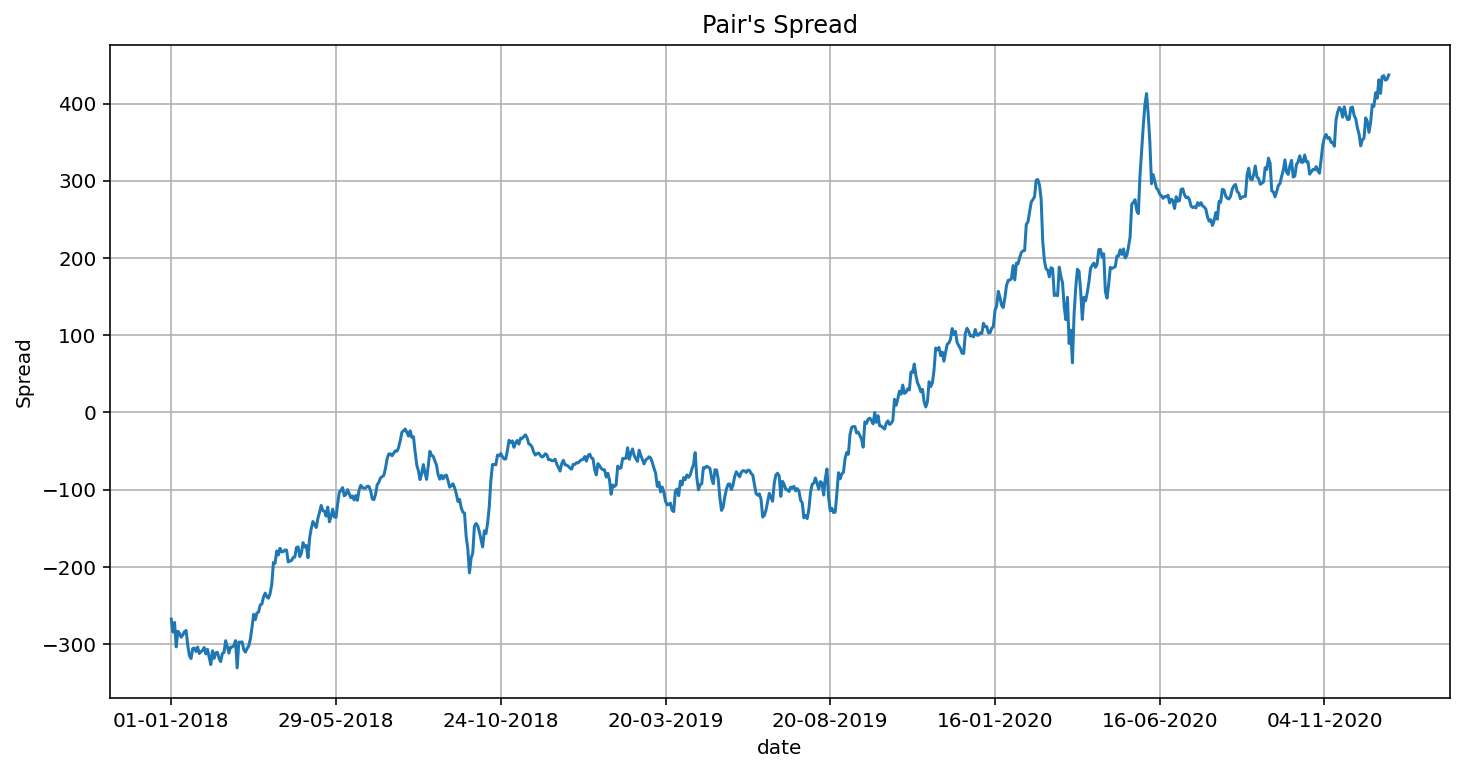

In [16]:
# Plot the spread
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
ax.set_ylabel("Spread")
ax.grid(True);
plt.savefig('chart5', dpi=400);

In [17]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
adf

(-0.39310846721840376,
 0.9112430733698935,
 1,
 738,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903},
 5813.10043802559)

In [18]:
print('Critical Value = ', adf[0])

Critical Value =  -0.39310846721840376


In [19]:
# probablity critical values
print(adf[4])

{'1%': -3.4392418578608983, '5%': -2.86546426916434, '10%': -2.568859710342903}


### Generate Trading Signals using z-score

In [20]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [21]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

In [22]:
signals.head()

asset1      asset2
date                              
01-01-2021  485.049988  828.349976
04-01-2021  484.000000  837.150024
05-01-2021  484.100006  893.900024
06-01-2021  479.049988  898.849976
07-01-2021  482.250000  879.549988

In [23]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [24]:
signals.head()

asset1      asset2         z  z upper limit  z lower limit
date                                                                      
01-01-2021  485.049988  828.349976  1.137490            1.0           -1.0
04-01-2021  484.000000  837.150024  0.972183            1.0           -1.0
05-01-2021  484.100006  893.900024  0.155812            1.0           -1.0
06-01-2021  479.049988  898.849976 -0.036066            1.0           -1.0
07-01-2021  482.250000  879.549988  0.306008            1.0           -1.0

In [25]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [26]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

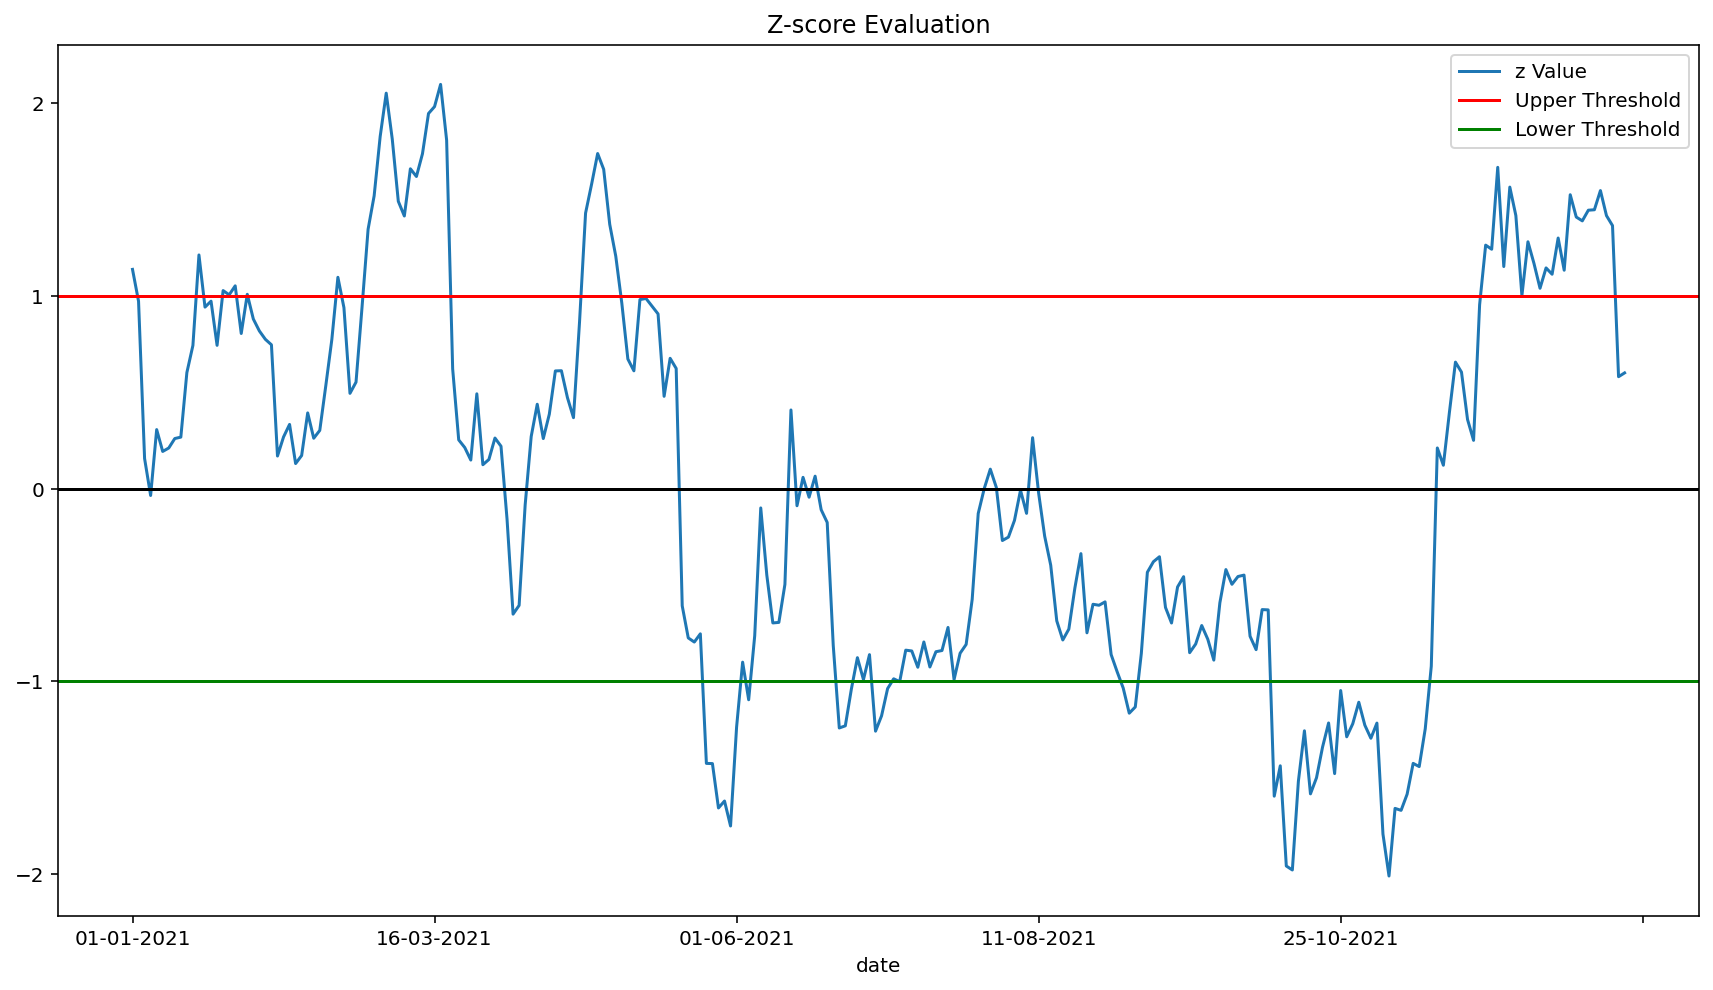

In [27]:
# # visualize z-score and upper and lower thresholds   
signals['z'].plot(label="z Value")
plt.title("Z-score Evaluation")
plt.axhline(signals['z'].mean(),color="black")
plt.axhline(signals['z upper limit'].mean(), color="red", label="Upper Threshold")
plt.axhline(signals['z lower limit'].mean(), color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.savefig('chart6', dpi=400);

In [28]:
# verify dataframe head and tail
signals.head(3).append(signals.tail(3))

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                          
01-01-2021  485.049988   828.349976  1.137490            1.0           -1.0   
04-01-2021  484.000000   837.150024  0.972183            1.0           -1.0   
05-01-2021  484.100006   893.900024  0.155812            1.0           -1.0   
29-12-2021  748.400024  1256.250000  1.364595            1.0           -1.0   
30-12-2021  734.099976  1309.500000  0.580504            1.0           -1.0   
31-12-2021  737.450012  1313.400024  0.600271            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021        -1         NaN         1         NaN  
04-01-2021         0         1.0         0        -1.0  
05-01-2021         0         0.0         0         0.0  
29-12-2021        -1         0.0         1         0.0  
30-12-2021         0         1.0         0        -1.0  
31-12-2021         0         0.0         0         0.0

In [29]:
# # check portfolio position
signals[signals.signals1 != 0].head(10)

asset1      asset2         z  z upper limit  z lower limit  \
date                                                                         
01-01-2021  485.049988  828.349976  1.137490            1.0           -1.0   
18-01-2021  483.649994  821.250000  1.212399            1.0           -1.0   
22-01-2021  485.350006  835.900024  1.027503            1.0           -1.0   
25-01-2021  478.899994  826.200012  1.005418            1.0           -1.0   
27-01-2021  482.049988  828.650024  1.051991            1.0           -1.0   
29-01-2021  477.549988  823.700012  1.008102            1.0           -1.0   
19-02-2021  510.200012  874.049988  1.096392            1.0           -1.0   
26-02-2021  508.549988  854.849976  1.345819            1.0           -1.0   
01-03-2021  505.299988  838.450012  1.518941            1.0           -1.0   
02-03-2021  516.000000  837.000000  1.827436            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021        -1         NaN         1         NaN  
18-01-2021        -1        -1.0         1         1.0  
22-01-2021        -1        -1.0         1         1.0  
25-01-2021        -1         0.0         1         0.0  
27-01-2021        -1         0.0         1         0.0  
29-01-2021        -1        -1.0         1         1.0  
19-02-2021        -1        -1.0         1         1.0  
26-02-2021        -1        -1.0         1         1.0  
01-03-2021        -1         0.0         1         0.0  
02-03-2021        -1         0.0         1         0.0

In [30]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                          
01-01-2021  485.049988   828.349976  1.137490            1.0           -1.0   
04-01-2021  484.000000   837.150024  0.972183            1.0           -1.0   
18-01-2021  483.649994   821.250000  1.212399            1.0           -1.0   
19-01-2021  484.149994   839.400024  0.941596            1.0           -1.0   
22-01-2021  485.350006   835.900024  1.027503            1.0           -1.0   
06-09-2021  597.000000  1203.099976 -0.855741            1.0           -1.0   
07-10-2021  615.849976  1330.099976 -1.596598            1.0           -1.0   
16-11-2021  686.849976  1392.500000 -0.921969            1.0           -1.0   
30-11-2021  765.400024  1294.650024  1.263330            1.0           -1.0   
30-12-2021  734.099976  1309.500000  0.580504            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021        -1         NaN         1         NaN  
04-01-2021         0         1.0         0        -1.0  
18-01-2021        -1        -1.0         1         1.0  
19-01-2021         0         1.0         0        -1.0  
22-01-2021        -1        -1.0         1         1.0  
06-09-2021         0        -1.0         0         1.0  
07-10-2021         1         1.0        -1        -1.0  
16-11-2021         0        -1.0         0         1.0  
30-11-2021        -1        -1.0         1         1.0  
30-12-2021         0         1.0         0        -1.0

In [31]:
signals.loc[signals['positions1'] == 1].index
signals['asset1'][signals['positions1'] == 1].value_counts()

484.000000    1
484.149994    1
478.200012    1
476.750000    1
494.200012    1
477.899994    1
513.950012    1
517.299988    1
524.250000    1
569.549988    1
572.349976    1
576.049988    1
583.799988    1
615.849976    1
734.099976    1
Name: asset1, dtype: int64

In [32]:
signals

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                          
01-01-2021  485.049988   828.349976  1.137490            1.0           -1.0   
04-01-2021  484.000000   837.150024  0.972183            1.0           -1.0   
05-01-2021  484.100006   893.900024  0.155812            1.0           -1.0   
06-01-2021  479.049988   898.849976 -0.036066            1.0           -1.0   
07-01-2021  482.250000   879.549988  0.306008            1.0           -1.0   
...                ...          ...       ...            ...            ...   
27-12-2021  744.599976  1233.000000  1.546456            1.0           -1.0   
28-12-2021  748.599976  1251.699951  1.416473            1.0           -1.0   
29-12-2021  748.400024  1256.250000  1.364595            1.0           -1.0   
30-12-2021  734.099976  1309.500000  0.580504            1.0           -1.0   
31-12-2021  737.450012  1313.400024  0.600271            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021        -1         NaN         1         NaN  
04-01-2021         0         1.0         0        -1.0  
05-01-2021         0         0.0         0         0.0  
06-01-2021         0         0.0         0         0.0  
07-01-2021         0         0.0         0         0.0  
...              ...         ...       ...         ...  
27-12-2021        -1         0.0         1         0.0  
28-12-2021        -1         0.0         1         0.0  
29-12-2021        -1         0.0         1         0.0  
30-12-2021         0         1.0         0        -1.0  
31-12-2021         0         0.0         0         0.0  

[248 rows x 9 columns]

In [33]:
signals = signals.reset_index()

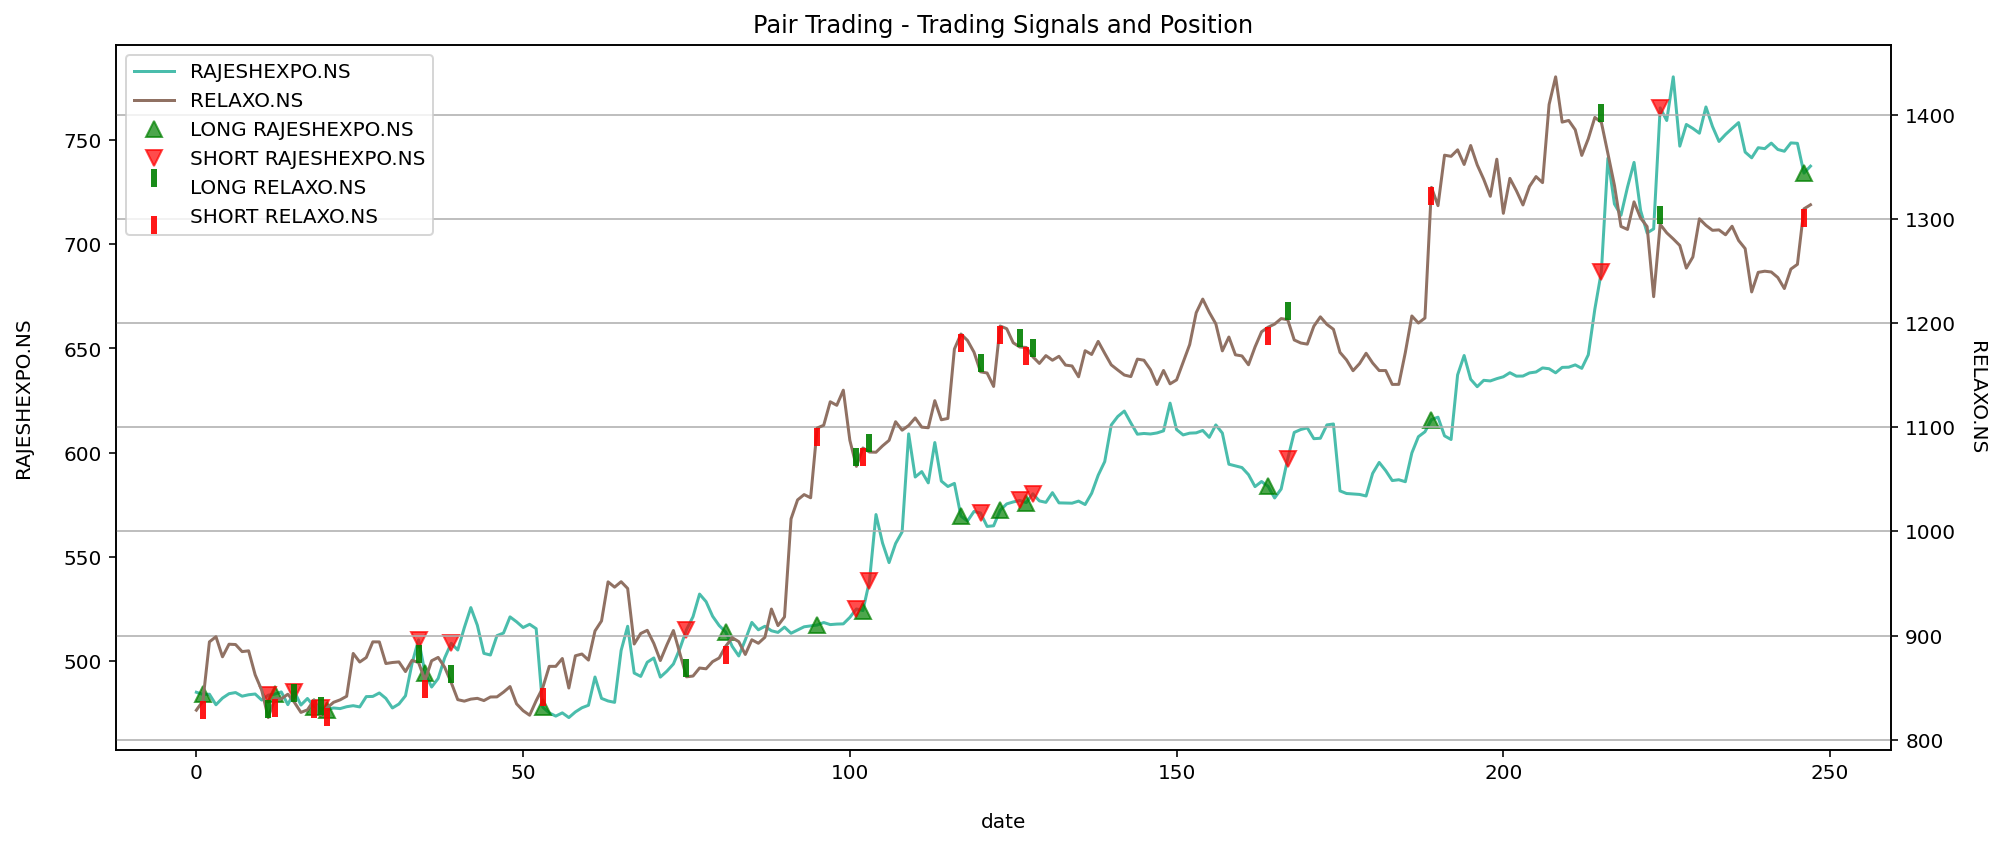

In [34]:
# visualize trading signals and position
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac')
l2, = bx2.plot(signals['asset2'], c='#907163')

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(asset1,)
bx2.set_ylabel(asset2, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('date')
# bx.xaxis.set_major_formatter(DateFormatter("%Y"))
# bx2.xaxis.set_major_formatter(DateFormatter("%Y"))
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best')

plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.savefig('chart7', dpi=400);

### Portfolio Profit and Loss Calculation

In [35]:
# initial capital to calculate the actual pnl
initial_capital = 100000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])

In [36]:
# since there are two assets, we calculate each asset Pnl separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']

In [37]:
portfolio.head().append(portfolio.tail())

asset1     holdings1          cash1   total asset1   return1  \
0    485.049988           NaN            NaN            NaN       NaN   
1    484.000000  61952.000000   38048.000000  100000.000000       NaN   
2    484.100006  61964.800781   38048.000000  100012.800781  0.000128   
3    479.049988  61318.398438   38048.000000   99366.398438 -0.006463   
4    482.250000  61728.000000   38048.000000   99776.000000  0.004122   
243  744.599976      0.000000  157990.406246  157990.406246  0.000000   
244  748.599976      0.000000  157990.406246  157990.406246  0.000000   
245  748.400024      0.000000  157990.406246  157990.406246  0.000000   
246  734.099976  93964.796877   64025.609370  157990.406246  0.000000   
247  737.450012  94393.601562   64025.609370  158419.210931  0.002714   

     positions1  
0           NaN  
1           1.0  
2           0.0  
3           0.0  
4           0.0  
243         0.0  
244         0.0  
245         0.0  
246         1.0  
247         0.0

In [38]:
portfolio[portfolio.positions1 != 0].head()

asset1     holdings1          cash1   total asset1   return1  \
0   485.049988           NaN            NaN            NaN       NaN   
1   484.000000  61952.000000   38048.000000  100000.000000       NaN   
11  483.649994      0.000000   99955.199219   99955.199219  0.003018   
12  484.149994  61971.199219   37984.000000   99955.199219  0.000000   
15  485.350006      0.000000  100108.800781  100108.800781  0.008056   

    positions1  
0          NaN  
1          1.0  
11        -1.0  
12         1.0  
15        -1.0

In [39]:
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']

In [40]:
portfolio.to_csv('portfolio.csv')
portfolio.head().append(portfolio.tail())

asset1     holdings1          cash1   total asset1   return1  \
0    485.049988           NaN            NaN            NaN       NaN   
1    484.000000  61952.000000   38048.000000  100000.000000       NaN   
2    484.100006  61964.800781   38048.000000  100012.800781  0.000128   
3    479.049988  61318.398438   38048.000000   99366.398438 -0.006463   
4    482.250000  61728.000000   38048.000000   99776.000000  0.004122   
243  744.599976      0.000000  157990.406246  157990.406246  0.000000   
244  748.599976      0.000000  157990.406246  157990.406246  0.000000   
245  748.400024      0.000000  157990.406246  157990.406246  0.000000   
246  734.099976  93964.796877   64025.609370  157990.406246  0.000000   
247  737.450012  94393.601562   64025.609370  158419.210931  0.002714   

     positions1       asset2     holdings2          cash2   total asset2  \
0           NaN   828.349976           NaN            NaN            NaN   
1           1.0   837.150024 -57763.351684  157763.351684  100000.000000   
2           0.0   893.900024 -61679.101684  157763.351684   96084.250000   
3           0.0   898.849976 -62020.648316  157763.351684   95742.703367   
4           0.0   879.549988 -60688.949158  157763.351684   97074.402525   
243         0.0  1233.000000      0.000000   73303.902443   73303.902443   
244         0.0  1251.699951      0.000000   73303.902443   73303.902443   
245         0.0  1256.250000      0.000000   73303.902443   73303.902443   
246         1.0  1309.500000 -90355.500000  163659.402443   73303.902443   
247         0.0  1313.400024 -90624.601656  163659.402443   73034.800787   

          return2  positions2  
0             NaN         NaN  
1             NaN        -1.0  
2   -3.915750e-02         0.0  
3   -3.554658e-03         0.0  
4    1.390915e-02         0.0  
243  0.000000e+00         0.0  
244  0.000000e+00         0.0  
245  0.000000e+00         0.0  
246 -2.220446e-16        -1.0  
247 -3.671041e-03         0.0

In [41]:
portfolio[portfolio.positions2 != 0].head()

asset1     holdings1          cash1   total asset1   return1  \
0   485.049988           NaN            NaN            NaN       NaN   
1   484.000000  61952.000000   38048.000000  100000.000000       NaN   
11  483.649994      0.000000   99955.199219   99955.199219  0.003018   
12  484.149994  61971.199219   37984.000000   99955.199219  0.000000   
15  485.350006      0.000000  100108.800781  100108.800781  0.008056   

    positions1      asset2     holdings2          cash2   total asset2  \
0          NaN  828.349976           NaN            NaN            NaN   
1          1.0  837.150024 -57763.351684  157763.351684  100000.000000   
11        -1.0  821.250000      0.000000  101097.101684  101097.101684   
12         1.0  839.400024 -57918.601684  159015.703367  101097.101684   
15        -1.0  835.900024      0.000000  101338.601684  101338.601684   

     return2  positions2  
0        NaN         NaN  
1        NaN        -1.0  
11  0.018278         1.0  
12  0.000000        -1.0  
15  0.005305         1.0

In [42]:
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

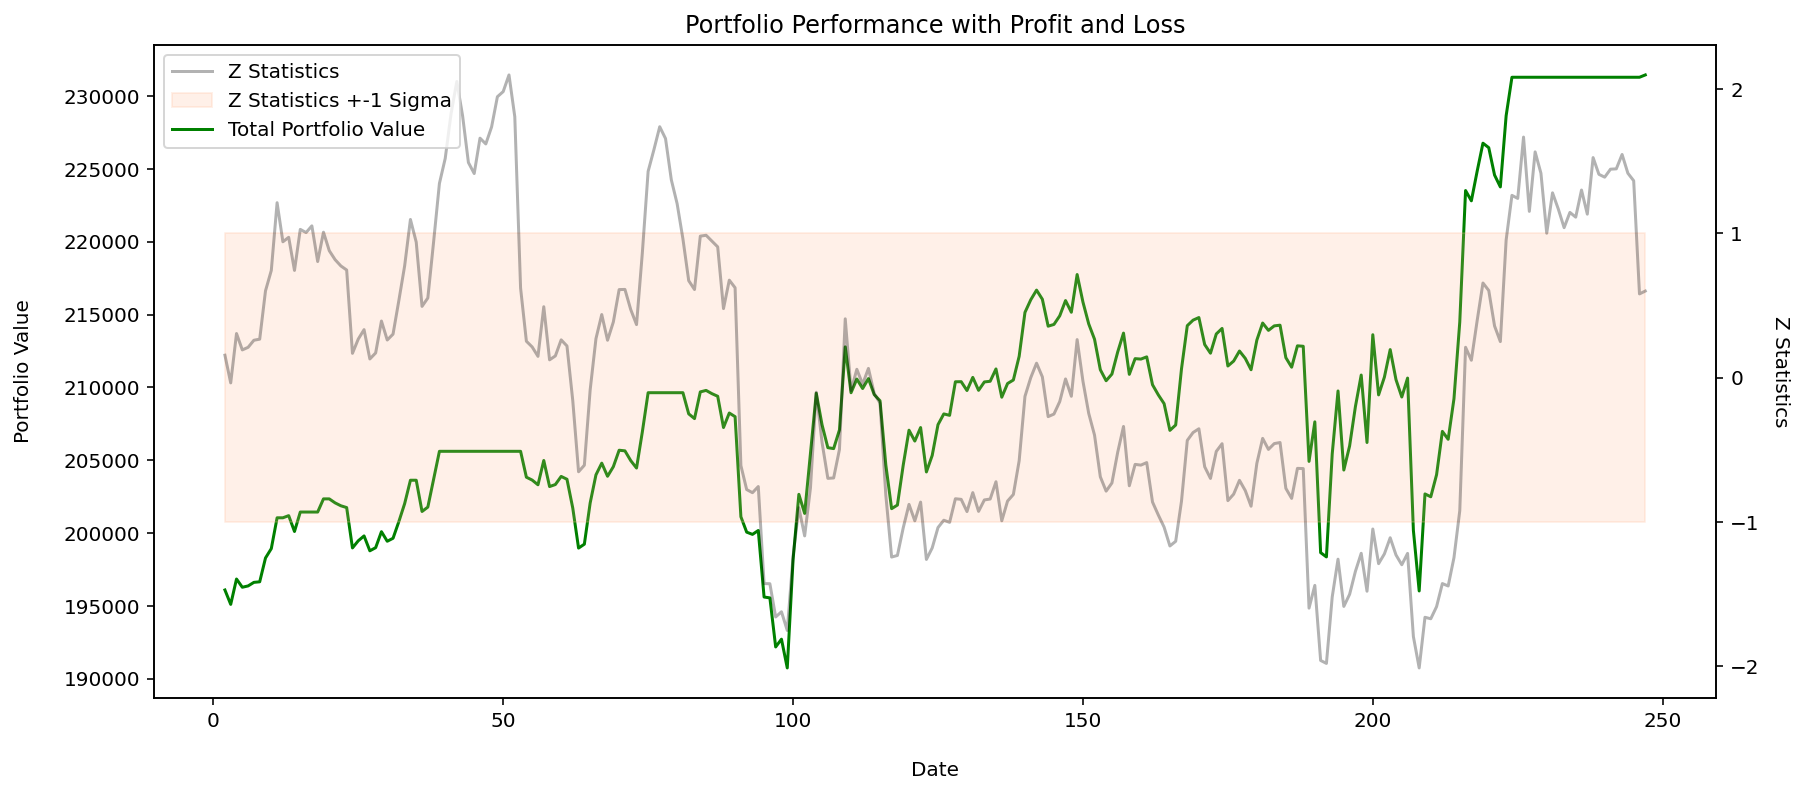

In [43]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(14,6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='g')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.3)

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='#ffb48f')

ax.set_ylabel('Portfolio Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date')
ax.xaxis.labelpad=15
plt.title('Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');
plt.savefig('chart8', dpi=400);

In [46]:
# calculate CAGR
final_portfolio = portfolio['total asset'].iloc[-1]
final_portfolio

231454.01171779993

In [47]:
profit = final_portfolio - 2*initial_capital
profit

31454.011717799935

In [48]:
roi = (profit/(2*initial_capital))*100
roi

15.727005858899968

In [ ]:
# delta = (portfolio.index[-1] - portfolio.index[0]).days
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

In [45]:
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 249.123%
